In [48]:
#importa bibliotecas
import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import preprocessing
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

Leitura da base de dados e visualização

In [26]:
data = pd.read_csv("music_genre.csv")
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [27]:
data.columns

Index(['instance_id', 'artist_name', 'track_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'obtained_date', 'valence', 'music_genre'],
      dtype='object')

Limpeza da base de dados

In [28]:
df=data[['artist_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence','music_genre']]
df.describe()
print(df.isnull().sum())

artist_name         5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
valence             5
music_genre         5
dtype: int64


In [29]:
df=df.dropna(axis=0)
print(df.isnull().sum())

artist_name         0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
music_genre         0
dtype: int64


Análise exploratória

In [30]:
df['music_genre'].value_counts()

Rock           5000
Country        5000
Hip-Hop        5000
Rap            5000
Alternative    5000
Anime          5000
Blues          5000
Jazz           5000
Electronic     5000
Classical      5000
Name: music_genre, dtype: int64

In [31]:
df['artist_name'].value_counts(True)*100

empty_field                 4.978
Nobuo Uematsu               0.858
Wolfgang Amadeus Mozart     0.804
Ludwig van Beethoven        0.634
Johann Sebastian Bach       0.628
Frédéric Chopin             0.482
Drake                       0.344
Capcom Sound Team           0.338
Yuki Hayashi                0.334
Eminem                      0.294
Future                      0.248
Thievery Corporation        0.244
The Black Keys              0.228
Pyotr Ilyich Tchaikovsky    0.206
Kevin Gates                 0.204
Mac Miller                  0.194
Howard Shore                0.186
Logic                       0.184
$uicideBoy$                 0.184
Ryuichi Sakamoto            0.180
ASIAN KUNG-FU GENERATION    0.178
Wiz Khalifa                 0.174
Bonobo                      0.170
Upchurch                    0.170
Claude Debussy              0.166
Gorillaz                    0.164
The Beatles                 0.162
George Strait               0.160
Jamiroquai                  0.158
J. Cole       

In [32]:
df['artist_name'].value_counts()

empty_field                 2489
Nobuo Uematsu                429
Wolfgang Amadeus Mozart      402
Ludwig van Beethoven         317
Johann Sebastian Bach        314
Frédéric Chopin              241
Drake                        172
Capcom Sound Team            169
Yuki Hayashi                 167
Eminem                       147
Future                       124
Thievery Corporation         122
The Black Keys               114
Pyotr Ilyich Tchaikovsky     103
Kevin Gates                  102
Mac Miller                    97
Howard Shore                  93
Logic                         92
$uicideBoy$                   92
Ryuichi Sakamoto              90
ASIAN KUNG-FU GENERATION      89
Wiz Khalifa                   87
Bonobo                        85
Upchurch                      85
Claude Debussy                83
Gorillaz                      82
The Beatles                   81
George Strait                 80
Jamiroquai                    79
J. Cole                       79
          

In [33]:
pd.crosstab(df['artist_name'],df['music_genre'])

music_genre,Alternative,Anime,Blues,Classical,Country,Electronic,Hip-Hop,Jazz,Rap,Rock
artist_name,,,,,,,,,,
!!!,1,0,0,0,0,21,0,0,0,0
"""Weird Al"" Yankovic",0,0,0,0,0,0,0,0,0,1
$NOT,0,0,0,0,0,0,3,0,0,0
$tupid Young,0,0,0,0,0,0,0,0,1,0
$uicideBoy$,0,0,0,0,0,0,51,0,41,0
(Hed) P.E.,2,0,0,0,0,0,0,0,0,0
(Sandy) Alex G,1,0,0,0,0,0,0,0,0,0
03 Greedo,0,0,0,0,0,0,3,0,2,0
04 Limited Sazabys,0,7,0,0,0,0,0,0,0,0


In [34]:
dic={"Alternative":0,"Anime":1,"Blues":2,"Classical":3,"Country":4,"Electronic":5,"Hip-Hop":6,"Jazz":7,"Rap":8,"Rock":9}
df['music_genre']=df['music_genre'].map(dic)

In [35]:
df['Hip-Hop']=0
df.loc[df['music_genre']==6,"Hip-Hop"]=1

In [36]:
import seaborn as sns

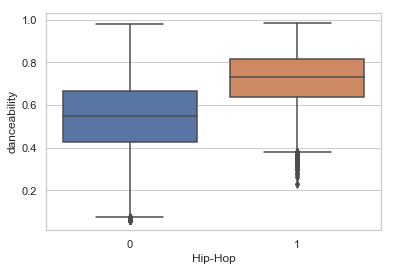

In [37]:
sns.boxplot(x=df['Hip-Hop'],y=df['danceability']);

In [38]:
df.dtypes

artist_name          object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo                object
valence             float64
music_genre           int64
Hip-Hop               int64
dtype: object

In [39]:
df['music_genre'].value_counts()

9    5000
8    5000
7    5000
6    5000
5    5000
4    5000
3    5000
2    5000
1    5000
0    5000
Name: music_genre, dtype: int64

In [40]:
lista_parametros=['popularity','acousticness', 'danceability','duration_ms', 'energy','instrumentalness', 'liveness','loudness','speechiness', 'valence']
X=df[lista_parametros]
Y=df['Hip-Hop']
X.dtypes

popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
valence             float64
dtype: object

In [41]:
def regress(Y,X):

#     X_cp = sm.add_constant(X)
    model = sm.Logit(Y,X)
    results = model.fit()
    
    return results

In [42]:
results = regress(Y,X)
results.summary()

Optimization terminated successfully.
         Current function value: 0.226645
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Hip-Hop   No. Observations:                50000
Model:                          Logit   Df Residuals:                    49990
Method:                           MLE   Df Model:                            9
Date:                Fri, 26 Nov 2021   Pseudo R-squ.:                  0.3028
Time:                        22:57:54   Log-Likelihood:                -11332.
converged:                       True   LL-Null:                       -16254.
                                        LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
popularity           0.0373      0.001     27.277      0.000       0.035       0.040
acousticness        -1.4416      0.088    -16.337      0.000      -1.615      -1.269
danceability         2.6635      0.115     23.233      0.000       2.439       2.888
duration_ms      -1.325e-06   1.89e-07     -7.003      0.000    -1.7e-06   -9.54e-07
energy              -5.3308      0.102    -52.022      0.000      -5.532      -5.130
instrumentalness    -3.3843      0.231    -14.674      0.000      -3.836      -2.932
liveness             0.2460      0.116      2.129      0.033       0.020       0.472
loudness             0.2897      0.007     39.143      0.000       0.275       0.304
speechiness          6.0184      0.132     45.513      0.000       5.759       6.278
valence             -0.6499      0.085     -7.619      0.000      -0.817      -0.483
====================================================================================
"""

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[13473,     0],
       [ 1527,     0]], dtype=int64)

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     13473
           1       0.00      0.00      0.00      1527

   micro avg       0.90      0.90      0.90     15000
   macro avg       0.45      0.50      0.47     15000
weighted avg       0.81      0.90      0.85     15000



C:\Apps\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Apps\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Apps\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


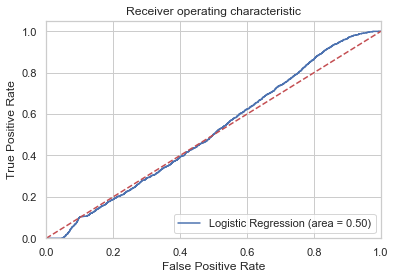

In [50]:
#ROC CURVE

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()